### Part 1.4 Label missing values

In [1]:
import pickle as pkl
import numpy as np
import pandas as pd
from functools import reduce
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

In [2]:
rgb_channels= True
normalize_image = True
normalize_coordinates = True

In [3]:
dic_train_data=pkl.load(open("data/dic_train_data.pkl","rb"))
dic_missing_data=pkl.load(open("data/dic_missing_data.pkl","rb"))

In [4]:
 # import tensorflow.keras.backend as K
# import tensorflow.keras as keras
# def euclidean_distance_loss(y_true, y_pred):
#   #     Euclidean distance loss
#     return K.sqrt(K.sum(K.square(y_pred - y_true), axis=-1))

# def absolute_tanh(x):
#     return K.abs(K.tanh(x))

# load model with custom loss incase want to retrain it otherwise with compile=False
# model = load_model('models/left_eye_center.h5',custom_objects={'euclidean_distance_loss': euclidean_distance_loss})
# model = load_model('models/left_eye_center.h5',compile=False)

In [5]:
features_len = len(dic_train_data)
features_len

14

In [6]:
features = list(dic_train_data.keys())
features

['left_eye_center',
 'right_eye_center',
 'left_eye_inner_corner',
 'left_eye_outer_corner',
 'right_eye_inner_corner',
 'right_eye_outer_corner',
 'left_eyebrow_inner_end',
 'left_eyebrow_outer_end',
 'right_eyebrow_inner_end',
 'right_eyebrow_outer_end',
 'mouth_left_corner',
 'mouth_right_corner',
 'mouth_center_top_lip',
 'mouth_center_bottom_lip']

In [7]:
dic_missing_data["left_eye_center"]

,left_eye_center_x,left_eye_center_y,Image
1687,NaN,NaN,"[[53, 55, 55, 56, 57, 58, 60, 62, 63, 64, 65, ..."
1834,NaN,NaN,"[[68, 68, 69, 68, 68, 70, 67, 68, 73, 70, 70, ..."
1866,NaN,NaN,"[[25, 23, 23, 22, 21, 21, 21, 19, 21, 25, 25, ..."
1938,NaN,NaN,"[[42, 41, 44, 47, 49, 44, 42, 42, 41, 42, 42, ..."
2100,NaN,NaN,"[[35, 16, 26, 31, 56, 33, 18, 25, 39, 71, 96, ..."
2137,NaN,NaN,"[[17, 17, 16, 16, 16, 14, 15, 15, 15, 15, 15, ..."
2153,NaN,NaN,"[[45, 51, 64, 51, 46, 61, 66, 61, 62, 60, 58, ..."
2175,NaN,NaN,"[[0, 0, 1, 0, 0, 1, 0, 1, 2, 2, 2, 2, 2, 2, 4,..."
2186,NaN,NaN,"[[178, 176, 174, 168, 159, 154, 150, 144, 135,..."
2239,NaN,NaN,"[[5, 7, 7, 12, 24, 53, 87, 81, 67, 87, 113, 12..."


In [9]:
def pre_process_images(df):
    images = np.vstack(df["Image"].values).reshape(-1, 96, 96, 1).astype(np.float32)
    if rgb_channels:
        images = np.repeat(images,3,-1)
    if normalize_image == True:
        images = images/255
    return images

### Predict the missing values

In [16]:
# predict features corrdinates using the trained models for the 14 features that contain missing values
# for each feature load its dataframe of which has the images that we shall predict the missing corrdinates for.
# preprocess the images first inorder to be able to feed it to the trained model, predict the coordinates for each image, then in case the coordinates were normalized in the 
# previous part then we need to reverse normalizing them using its corresponding scalers. And finaly fill the missing values with the predicted values
for i in range(0, len(features[:])):
    feature_name = features[i]
    df = dic_missing_data[feature_name]
    imgs = pre_process_images(df)
    model = load_model('models/'+feature_name+'.h5', compile=False)
    preds = model.predict(imgs)
    xs = preds[:,:1]
    ys = preds[:,1:]
    scalers_dict= pkl.load(open("scalers/"+feature_name+"_scalers_dict.pkl","rb"))
    if normalize_coordinates:
        xs = scalers_dict[feature_name+"_x"].inverse_transform(xs)[:,0]    
        ys = scalers_dict[feature_name+"_y"].inverse_transform(ys)[:,0]    
    dic_missing_data[feature_name].iloc[:,0]=xs
    dic_missing_data[feature_name].iloc[:,1]=ys    

In [20]:
df = dic_missing_data["left_eye_center"]

In [21]:
df.head()

,left_eye_center_x,left_eye_center_y,Image
1687,67.551674,38.858978,"[[53, 55, 55, 56, 57, 58, 60, 62, 63, 64, 65, ..."
1834,67.321693,38.886665,"[[68, 68, 69, 68, 68, 70, 67, 68, 73, 70, 70, ..."
1866,67.263222,39.093433,"[[25, 23, 23, 22, 21, 21, 21, 19, 21, 25, 25, ..."
1938,67.356514,38.619770,"[[42, 41, 44, 47, 49, 44, 42, 42, 41, 42, 42, ..."
2100,67.299103,38.935528,"[[35, 16, 26, 31, 56, 33, 18, 25, 39, 71, 96, ..."


In [22]:
# pkl.dump(dic_missing_data, open("data/filled_missing_dic2.pkl","wb"))

In [23]:
#  load nose_tip features
nose_tip = pkl.load(open("data/nose_tip.pkl",'rb'))

In [24]:
nose_tip

,index,nose_tip_x,nose_tip_y,Image
0,0,44.420571,57.066803,"[[238, 236, 237, 238, 240, 240, 239, 241, 241,..."
1,1,48.206298,55.660936,"[[219, 215, 204, 196, 204, 211, 212, 200, 180,..."
2,2,47.557263,53.538947,"[[144, 142, 159, 180, 188, 188, 184, 180, 167,..."
3,3,51.885078,54.166539,"[[193, 192, 193, 194, 194, 194, 193, 192, 168,..."
4,4,43.299534,64.889521,"[[147, 148, 160, 196, 215, 214, 216, 217, 219,..."
...,...,...,...,...
7044,7044,48.265961,67.029093,"[[71, 74, 85, 105, 116, 128, 139, 150, 170, 18..."
7045,7045,47.910346,66.626011,"[[60, 60, 62, 57, 55, 51, 49, 48, 50, 53, 56, ..."
7046,7046,49.462572,67.515161,"[[74, 74, 74, 78, 79, 79, 79, 81, 77, 78, 80, ..."
7047,7047,50.754202,66.724988,"[[254, 254, 254, 254, 254, 238, 193, 145, 121,..."


### Merge the complete and filled data 

In [25]:
all_data_dic = dict()
for i in range (0, len(features[:])):
    feature_name = features[i]
    d1 = dic_train_data[feature_name]
    d2 = dic_missing_data[feature_name]
    d_new = pd.concat([d1,d2], ignore_index=False)
    d_new.rename(columns={'Image': 'Image_'+feature_name},inplace=True)
    all_data_dic[feature_name] = d_new.reset_index()

In [27]:
all_dataframes= list(all_data_dic.values())

### Add the nose_tip feature to the data

In [28]:
all_dataframes.append(nose_tip)

In [50]:
all_dataframes[-1].head()

,index,nose_tip_x,nose_tip_y,Image
0,0,44.420571,57.066803,"[[238, 236, 237, 238, 240, 240, 239, 241, 241,..."
1,1,48.206298,55.660936,"[[219, 215, 204, 196, 204, 211, 212, 200, 180,..."
2,2,47.557263,53.538947,"[[144, 142, 159, 180, 188, 188, 184, 180, 167,..."
3,3,51.885078,54.166539,"[[193, 192, 193, 194, 194, 194, 193, 192, 168,..."
4,4,43.299534,64.889521,"[[147, 148, 160, 196, 215, 214, 216, 217, 219,..."


### Merge all the features together into main dataframe

In [30]:
main_df = reduce(lambda  left,right: pd.merge(left,right,on=['index'],how='inner'), all_dataframes)

In [31]:
main_df.columns

Index(['index', 'left_eye_center_x', 'left_eye_center_y',
       'Image_left_eye_center', 'right_eye_center_x', 'right_eye_center_y',
       'Image_right_eye_center', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'Image_left_eye_inner_corner',
       'left_eye_outer_corner_x', 'left_eye_outer_corner_y',
       'Image_left_eye_outer_corner', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'Image_right_eye_inner_corner',
       'right_eye_outer_corner_x', 'right_eye_outer_corner_y',
       'Image_right_eye_outer_corner', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'Image_left_eyebrow_inner_end',
       'left_eyebrow_outer_end_x', 'left_eyebrow_outer_end_y',
       'Image_left_eyebrow_outer_end', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'Image_right_eyebrow_inner_end',
       'right_eyebrow_outer_end_x', 'right_eyebrow_outer_end_y',
       'Image_right_eyebrow_outer_end', 'mouth_left_corner_x',
       'mouth_left_cor

### Leave only one column for the image

In [32]:
main_df.columns = [*main_df.columns[:-1], 'Image']
main_df = main_df.loc[:, ~main_df.columns.str.startswith('Image_')]
main_df.drop(columns=["index"], inplace=True)

In [51]:
main_df.head(1)

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,nose_tip_x,nose_tip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,44.420571,57.066803,"[[238, 236, 237, 238, 240, 240, 239, 241, 241,..."


### Visualize random images

In [8]:
def visualize_random_image(df,i=-1):
    """
    Method that visualize a certain image with index i in the df or a random image with i=-1.
    With plotting the facial keypoints specified in the df cols
    """
    # x-coordinates are in even columns like 0,2,4,.. and y-coordinates are in odd columns like 1,3,5,..
    if i==-1:
        i = np.random.randint(1, len(df))
        plt.figure()
        plt.imshow(df['Image'][i],cmap='gray')
        nbr_cols = df.columns.tolist()[:-1]
        for j in range(0,len(nbr_cols),2):
            plt.plot(df.loc[i][j], df.loc[i][j+1], 'rx')


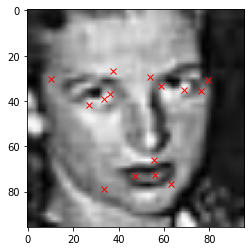

In [37]:
visualize_random_image(main_df)

In [35]:
def visualize_random_images(df):
    plt.figure(figsize=(30,30))
    for i in range(12):
        plt.subplot(6,6,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        j = np.random.randint(1, len(df))
        plt.imshow(df['Image'][j],cmap='gray')
        nbr_cols = df.columns.tolist()[:-1]
        for k in range(0,len(nbr_cols),2):
            plt.plot(df.loc[j][k], df.loc[j][k+1], 'rx')  
    plt.savefig("images/final_examples3.png", bbox_inches = "tight")         
    plt.show()

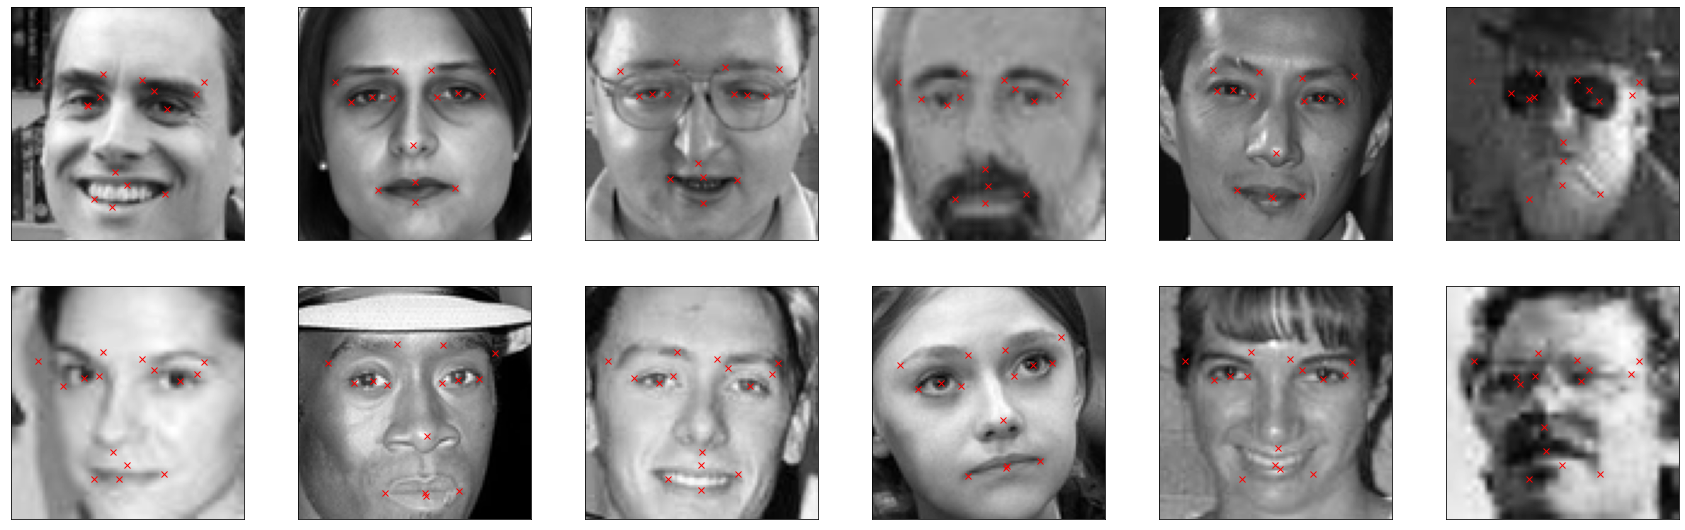

In [43]:
visualize_random_images(main_df)

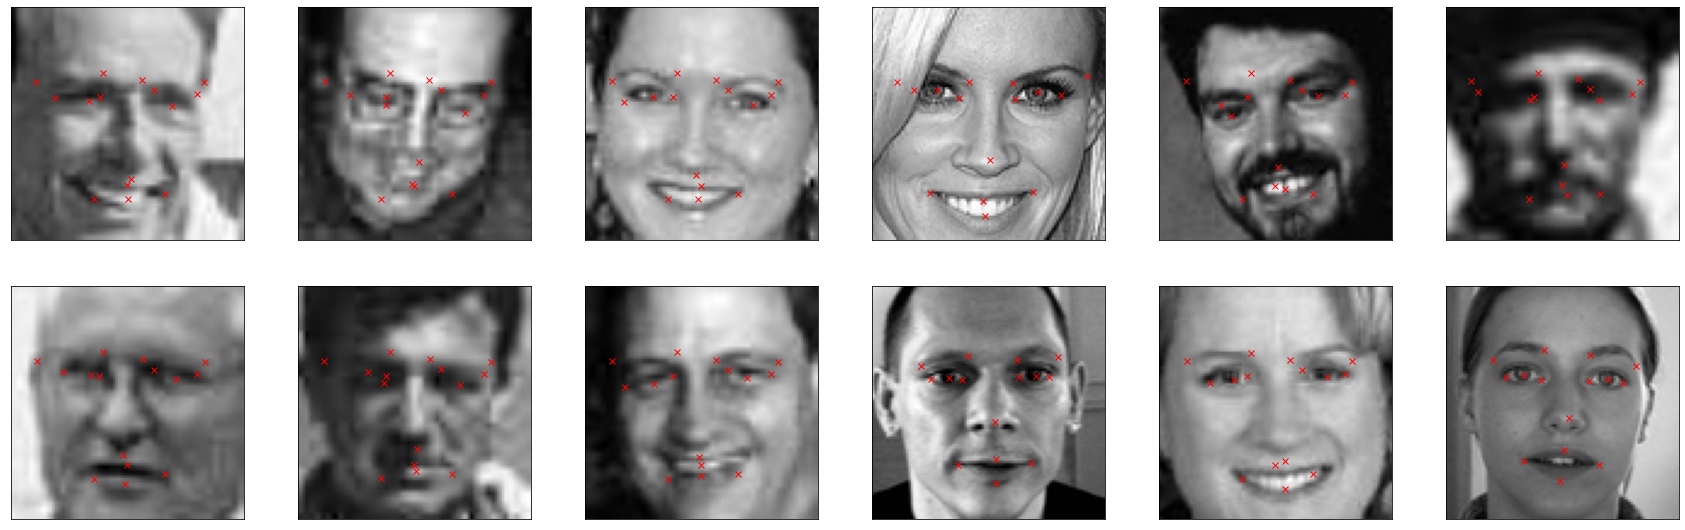

In [38]:
visualize_random_images(main_df)

### Save the main data to use it in the next part (building the prediction model)

In [39]:
pkl.dump(main_df, open("data/main_data2.pkl","wb"))